In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [2]:
list_files = os.listdir('datasets/history-scottish-witchcraft/')

In [3]:
# Put all data files into a dictionary of dataframes for easy access
def create_dfs(list_files):
    dfs_dict = {}
    for filename in list_files:
        if filename[-4:] == '.csv':
            df_name = filename[4:-4]
            dfs_dict[df_name] = pd.read_csv('datasets/history-scottish-witchcraft/{}'.format(filename))
    return dfs_dict

In [4]:
all_dfs = create_dfs(list_files)

In [5]:
all_dfs.keys()

['MovestoHLA',
 'CalendarCustom',
 'Imprisonment',
 'MentionedAsWitch',
 'RitualObject',
 'Commission',
 'ReligiousMotif',
 'DevilAppearance',
 'Appeal',
 'OtherNamedwitch',
 'ShapeChanging',
 'Complaint',
 'WitchesMeetingPlace',
 'Torture',
 'Elf_FairyElements',
 'WeatherModification',
 'Ref_Parish',
 'Trial_Person',
 'Case',
 'PropertyDamage',
 'PrevCommission',
 'DemonicPact',
 'Ordeal',
 'Person',
 'Denunciation',
 'Trial',
 'WhiteMagic',
 'MusicalInstrument',
 'Reference',
 'Source',
 'Confession',
 'CounterStrategy',
 'Malice',
 'Case_person',
 'Accused',
 'LinkedTrial',
 'Accused_family',
 'OtherCharges']

In [6]:
accused = all_dfs['Accused']

In [19]:
malice = all_dfs['Malice']

In [21]:
malice.Causeofmalice.unique()

array(['Failed business interaction', 'Debt', 'Jealousy of Neighbours',
       'Revenge', 'Grudge', 'Slander', 'Social slight', 'Physical insult',
       'Exclusion from social events', 'Refusal of alms', nan,
       'Business interactions', 'Failed healing',
       'Revenge for being called a witch', 'Verbal Insult', 'Taunting',
       'Envy'], dtype=object)

In [30]:
devil_appearance = all_dfs['DevilAppearance']

In [31]:
devil_by_type = devil_appearance.groupby("Devil_Type")['CaseRef'].count()

In [32]:
devil_by_type.sort_values(ascending=False)

Devil_Type
Male                      250
Animal Devil               60
Female                     26
Spirit                     17
Unspecified Devil           9
Male Fairy                  9
Female Fairy                6
Ghost                       5
Fairy                       4
Inanimate Object Devil      2
Human Devil                 2
Other Demon                 1
Insect Devil                1
Child Devil                 1
Baby                        1
Name: CaseRef, dtype: int64

In [208]:
def generate_cloud(text, img_path, out_file_path, background_color = "white", size = 12, add_stopwords = None):
    img_mask = np.array(Image.open(img_path))
    stopwords = STOPWORDS.update(add_stopwords)
    wc = WordCloud(background_color=background_color, max_words=3000, mask=img_mask,
                   stopwords=stopwords)
    wc.generate(text)
    # store to file
    wc.to_file(out_file_path)
    # show
    plt.figure(figsize=(size,size))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [91]:
trial = all_dfs['Trial']

In [34]:
case = all_dfs['Case']

In [206]:
add_stopwords = ["details", "also", "husband", "therefore", "modernise", "described", "mentioned", "think", "recorded"]

In [220]:
case_other_charges_text = pd.DataFrame(case["OtherChargesNotes"])
case_other_charges_text = case_other_charges_text.dropna()
case_other_charges_text = " ".join([w.lower() for w in case_other_charges_text.values.flatten().tolist()])

"kirk session minutes burgh council minutes presbytery entry kirk session kirk session presbytery records presbytery minutes presbytery records presbytery records presbytery records presbytery minutes presbytery records presbytery records presbytery records presbytery records presbytery records presbytery records kirk session records presbytery records specification of witchcraft under jurisdiction of circuit courts arrest of c. cauldwell (alias john dickson) as a witchpricker court book of orkney court book of shetland statute forbidding the concealment of witchcraft shetland law forbidding the concealment of witchcraft john kincaid, witch pricker examined general assembly policy ayre burgh accounts some persons in dreghorn minister's announcement to pursue witches church of scotland petition to parliament presbytery querry re: witch finders for tryal and torture of witches bailie requests ministers to wait upon 12 condemed witches presbytery request for commission bailie complaint to

In [230]:
print case.columns.tolist()

['CaseRef', 'CaseId', 'CaseSystemId', 'NamedIndividual', 'AccusedRef', 'CaseStart_date', 'CaseStart_date_as_date', 'Case_date', 'Case_date_as_date', 'Age_at_case', 'CaseCommonName', 'Commission', 'Complaint', 'Correspondence', 'Chronicle', 'Other', 'Suspects_text', 'UNorthodoxRelPract_p', 'UNorthodoxRelPract_s', 'Consulting_p', 'Consulting_s', 'Demonic_p', 'Demonic_s', 'Demonic_possess_p', 'Demonic_possess_s', 'Fairies_p', 'Fairies_s', 'Folk_healing_p', 'Folk_healing_s', 'Maleficium_p', 'Maleficium_s', 'Midwifery_p', 'Midwifery_s', 'ImplicatedByAnother_p', 'ImplicatedByAnother_s', 'Neighbhd_dispute_p', 'Neighbhd_dispute_s', 'PoliticalMotive_p', 'PoliticalMotive_s', 'PropertyMotive_p', 'PropertyMotive_s', 'RefusedCharity_p', 'RefusedCharity_s', 'Treason_p', 'Treason_s', 'Other_p', 'Other_s', 'OtherText', 'NotEnoughInfo_p', 'NotEnoughInfo_s', 'WhiteMagic_p', 'WhiteMagic_s', 'Charnotes', 'DemonicPact', 'DevilNotes', 'WitchesMeeting', 'MeetingName', 'DevilPresent', 'Maleficium', 'CommunalS

In [231]:
case_char_text = pd.DataFrame(case["Charnotes"])
case_char_text = case_char_text.dropna()
case_char_text = " ".join([w.lower() for w in case_char_text.values.flatten().tolist()])

In [178]:
accused_text = pd.DataFrame(accused['Notes'])
accused_text = accused_text.dropna()
accused_text = ' '.join([w.lower() for w in accused_text.Notes.values.flatten().tolist()])

In [235]:
witches_text = accused_text + case_other_charges_text + case_char_text

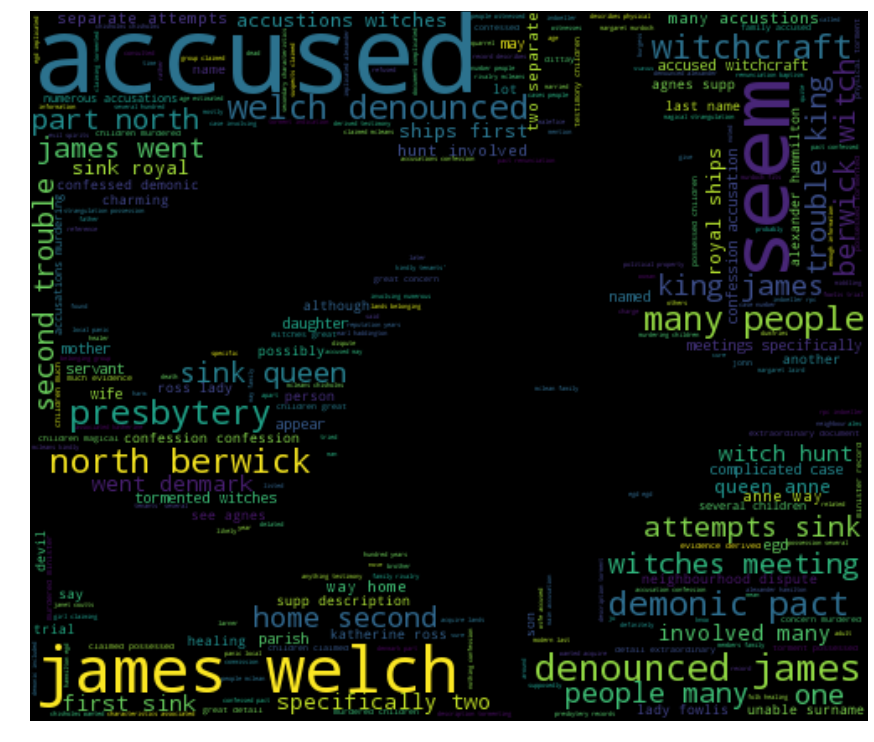

In [258]:
generate_cloud(witches_text, "images/witch8.jpg", "images/witch_cloud_3.png", 
               background_color= 'black', add_stopwords=add_stopwords, size = 15)

In [115]:
devil_notes = pd.DataFrame(case['DevilNotes'])
devil_notes = devil_notes.dropna()
devil_text = " ".join([w.lower() for w in devil_notes.values.flatten().tolist()])
devil_text

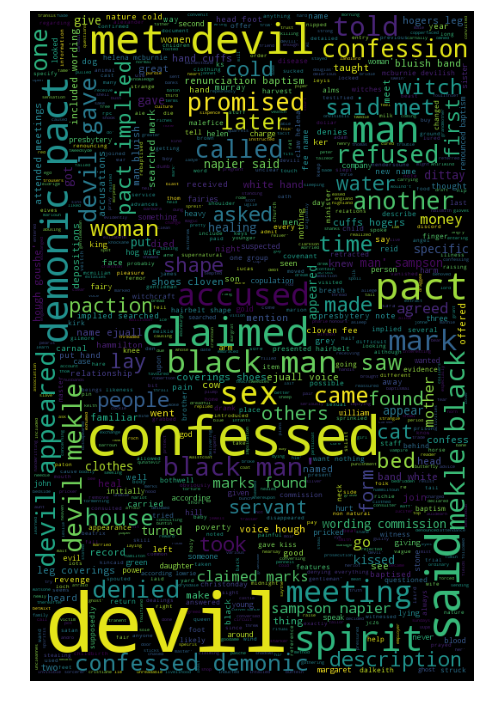

In [244]:
generate_cloud(devil_text, "images/De", "images/devil_cloud_1.png", 
               background_color="black", add_stopwords=add_stopwords)

In [143]:
# images taken from http://www.fun-lover.com/graphic-shop/Masks/index.php?page=&sort=&perPage=&album=Halloween
# and https://openclipart.org/detail/233745/devil-silhouette